In [5]:
import matplotlib.pyplot as plt
import numpy as np

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)创建num个start～stop之间的等差数列
# meshgrid()产生格点矩阵，用于三维曲面的分格线座标
# meshgrid(range(-3,4),range(-2,3))产生两个都是5*7的矩阵X和Y,其中X是由第一个行向量产生，Y是由第二个行向量产生
X, Y = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))

A = np.matrix([[4.0,2.0],[1.0,3.0]])
B = np.matrix([[3.0],[2.0]])

R = A.T.dot(A)
P = A.T.dot(B)

print(R)
print(P)
print(B.T.dot(B))

# 定义代价方程
# 不明白这个代价方程怎么来的
def cost_func(X,Y):
    return R[0,0]*(X**2)+R[1,1]*(Y**2)+(R[0,1]+R[1,0])*X*Y-2*P[0,0]*X-2*P[1,0]*Y

# 如果这样定义代价方程，计算出的结果有些问题，暂时还没搞明白
def cost_func2(X):
    return X.T.dot(R).dot(X) - X.T.dot(P) - P.T.dot(X) + B.T.dot(B)

z = cost_func(X,Y)

[[17. 11.]
 [11. 13.]]
[[14.]
 [12.]]
[[13.]]


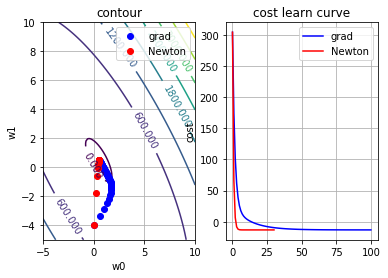

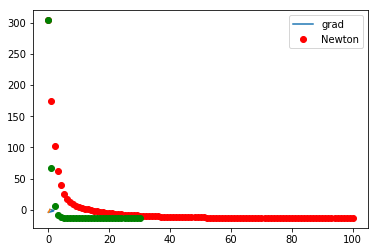

In [9]:
# w, w_n分别用来存最速下降和牛顿法的迭代过程
w=np.matrix([[0],[-4]])
w_n=np.matrix([[0],[-4]])

# 梯度下降法
for i in range(100):
    w_t = w[:,-1]
    w=np.hstack((w,w_t-0.01*(R.dot(w_t)-P)))

# NewTon法 

#Hessian matrix，这里不明白    
H=np.matrix([[2.0*R[0,0],R[0,1]+R[1,0]],[R[0,1]+R[1,0],2.0*R[1,1]]])

for _ in range(30):
    w_t = w_n[:,-1]
    w_n=np.hstack((w_n,w_t-H.I.dot(R.dot(w_t)-P)))
    
w = np.array(w)
w_n = np.array(w_n)

# 学习曲线
L=cost_func(w[0,:], w[1,:])
L_n=cost_func(w_n[0,:], w_n[1,:])


# 输出图形
# 2d plot

f, (ax1, ax2) = plt.subplots(1, 2)
CS = ax1.contour(X, Y, z)
ax1.plot(w[0,:], w[1,:], 'bo',w_n[0,:],w_n[1,:], 'ro')

ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_title('contour')
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.legend(('grad', 'Newton'))
ax1.grid(True)


ax2.plot(range(101),L,'b',range(31),L_n,'r')
ax2.set_title('cost learn curve')
ax2.set_ylabel('cost')
ax2.legend(('grad', 'Newton'))
ax2.grid(True)


# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111)
# 先画出整个大曲面，然后在大曲面上画出迭代过程中的每个点
ax.plot(w[0,:],w[1,:],L,'ro')
ax.plot(w_n[0,:],w_n[1,:],L_n,'go')
ax.legend(('grad', 'Newton'))

plt.show()